## Support Vector Machine and Radial Base Function to predict whether a person will default on their credit card

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as colors
from sklearn.utils import resample     # for downsample our dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV     # this will do cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('default of credit card clients.xls',
                  header = 1, # Note: the second line contains columns, so we skip the first line
                  )

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

## Columns details

- **ID** the id number assigned to each customer

- **LIMIT_BALL** Credit Limit

- **SEX** Gender

- **EDUCATION** Level of education

- **MARRIAGE** Marital Status

- **AGE** Age

- **PAY_**, When the last bills were paid

- **BIL_AMT** What the last 6 bills were

- **PAY_AMT** How much the las payments were

- default payment next month


In [4]:
df.rename({'default payment next month' : 'DEFAULT'}, axis="columns", inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.drop("ID", axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.info() # df.dtypes only displays the data types of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [7]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

### We should make sure each columns contains acceptable values. The list below describe what values are allowed in each column and was based on the descriptions on the datasets

- **LIMIT_BAL** The amount of available credit **integer**

- **SEX, CATEGORY**

    - 1 = male
    - 2 = female

- **Education, Category**
    - 1 = graduate school
    - 2 = university
    - 3 = high school
    - 4 = others
    
- **MARRIAGE, Category**
    - 1 = Married
    - 2 = single
    - 3 = others

- **AGE, Integer**

- **PAY_**, When the last 6 bills payed **Category**
    - -1 = Paid on time
    - 1 = Payment delayed by 1 month
    - 2 = Payment delayed by 2 month
    - ...
    - 8 = Payment delayed by 8 month
    - 9 = Payment delayed by 9 month
    
- **BILL_AMT** what the last 6 bills were. **Integer**

- **PAY_AMT** How much the last payments were **Integer**

- **DEFAULT** Whether or not a person defaulted on the next payment **Category**
    - 0 = Did not default
    - 1 = defaulted
    

Lets start by **SEX** only contains 1, 2

In [8]:
df['SEX'].unique()

array([2, 1])

In [9]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

#### Notice: eductaion have extra values from allowed values. May be 0 represent missing data. Number 5, 6 represent the category that is not metioned the specification> But that is just a gues.

In [10]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

#### extra value 0

## Dealing with missing values

In [11]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

So 68 of the 30000 rows or less than 1% conatin missing values. Since that still leaves us with more data than we need for Support Vector Machine, will remove the rows with the missing values. Rather than try to impute their values. 

In [12]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [13]:
df_no_missing.shape

(29932, 24)

In [14]:
df = df_no_missing
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [15]:
df['MARRIAGE'].unique()

array([1, 2, 3])

## Downsample the dataset

**Support Vector Machine** are great with small datasets, but not awesome with the lasrge ones, and this dataset, while not huge, is big enough to take a long time to optimize with **Cross Validation**. So we'll downsample both categories, customers who did and didnot default, to 1000

In [16]:
df_not_default = df[df['DEFAULT'] == 0]
df_default = df[df['DEFAULT'] == 1]

In [17]:
df_no_default_downsample = resample(df_not_default,
                                    replace = True,
                                    n_samples = 1000,
                                    random_state = 42
                                   )
len(df_no_default_downsample)

1000

In [18]:
df_default_downsample = resample(df_default,
                                 replace = True,
                                 n_samples = 1000,
                                 random_state = 42
                                )


Now we concat the dataset

In [19]:
df_downsample = pd.concat([df_no_default_downsample, df_default_downsample])
df_downsample.shape

(2000, 24)

In [20]:
X = df_downsample.drop('DEFAULT', axis = 1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20506,400000,1,1,2,28,-1,0,-1,0,0,...,240244,287499,86684,6796,5056,241366,278006,425,34,2966
1099,110000,1,1,1,50,0,0,0,0,0,...,40259,41585,42913,44197,2000,3000,2000,2000,2000,2000
6955,640000,2,1,1,50,-2,-2,-2,-2,-2,...,22238,9877,10110,23910,8853,22243,9877,10110,24616,5952
27815,220000,2,1,2,26,0,0,0,0,0,...,41422,44738,51479,56653,5000,8000,4000,7500,6000,4494
15452,120000,1,1,2,27,0,0,2,0,0,...,79384,81367,82321,84336,3900,3300,3900,3200,3500,3500


In [21]:
y = df_downsample['DEFAULT'].copy()
y.head()

20506    0
1099     0
6955     0
27815    0
15452    0
Name: DEFAULT, dtype: int64

## Format the data : ONE-HOT-ENCODING

**NOTE** There are many ways to do one-hot-encoding in python. Two of more popular are ```ColumnTransformer()``` (from scikit-learn) and ```get_dummies()``` from pandas, and both methos have pros and cons. 

```ColumnTransformer()``` has very cool features where where it creates a persistent funcion that can validate the data you get in future. The downside of ```ColumnTransformer()``` is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of ```ColumnTransformer()``` worked as you inetended to it

In [22]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
20506,400000,1,1,28,-1,0,-1,0,0,0,...,6796,5056,241366,278006,425,34,2966,0,1,0
1099,110000,1,1,50,0,0,0,0,0,0,...,44197,2000,3000,2000,2000,2000,2000,1,0,0
6955,640000,2,1,50,-2,-2,-2,-2,-2,-2,...,23910,8853,22243,9877,10110,24616,5952,1,0,0
27815,220000,2,1,26,0,0,0,0,0,0,...,56653,5000,8000,4000,7500,6000,4494,0,1,0
15452,120000,1,1,27,0,0,2,0,0,0,...,84336,3900,3300,3900,3200,3500,3500,0,1,0


Now we perform one-hot-encoding for all our categorical columns

In [23]:
X_encoded = pd.get_dummies(X, columns = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6'
])

X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
20506,400000,28,21012,10107,240244,287499,86684,6796,5056,241366,...,0,0,0,1,0,0,0,0,0,0
1099,110000,50,36802,38210,40259,41585,42913,44197,2000,3000,...,0,0,0,1,0,0,0,0,0,0
6955,640000,50,6482,8853,22238,9877,10110,23910,8853,22243,...,0,1,0,0,0,0,0,0,0,0
27815,220000,26,29452,33967,41422,44738,51479,56653,5000,8000,...,0,0,0,1,0,0,0,0,0,0
15452,120000,27,75896,77931,79384,81367,82321,84336,3900,3300,...,0,0,0,1,0,0,0,0,0,0


## Center and Scales the data

The **Radial Basis Function** that we are using with **Suport Vector Machine** assumes that the data are centered and scaled. in other words, each column should have mean=0 and standard-deviation=1. So we need to do this to both training and testing datasets.

**NOTE:** We split the dataset into training and testing datasets and scales them separately to avoid **Data Leackage**. **Data Leackage** occurs when information about the traiing dataset currupts or influence the data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.25, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Build a Preliminary Support Vecotor Machine

In [25]:
model = SVC(random_state = 42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

Lets see how it performs on the testing dataset and draw a **Confuion Matrix**

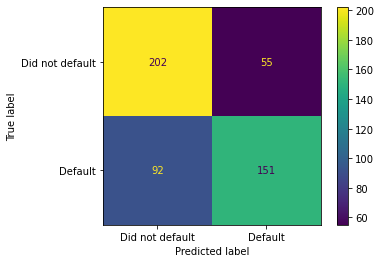

In [26]:
plot_confusion_matrix(model, 
                    X_test_scaled,
                    y_test,
                    values_format = 'd',
                    display_labels=['Did not default', 'Default']
                    )

## Optimize parameters with Cross validation and GridSearchCV()

Optimizing a **Support Vector Machine** is all about finding the dataset values for **gamma** and potentially, the regualarization parameter, C. 

Since We have two parameters to optimize we will use ```GridSearchCV```. We specify a bunch of potential values for **gamma** and **C**, and ```GridSearchCV``` tests all possible combinations of the parameters for us.

In [27]:
param_grid = [
    {
        'C' : [0.5, 1, 10, 100], # NOTE: values for C must be > 0
        'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel' : ['rbf'],
    }
]

## NOTE: We are including C=1 and gamma='scale'
## as possible choices since they are default values

optimal_params = GridSearchCV(
    SVC(), 
    param_grid, 
    cv = 5,
    scoring = 'accuracy', ## (accuracy is default scoring) Slighly improved but hardly !! C = 1, gamma='scales'
    ## scoring='balanced_accuracy', ## slightly improved, but hardly, C=1, gamma=0.01
    ## scoring='f1', ## Terrible C=0.5, gamma=1
    ## scoring='f1_micro', ## Slighly improved, but hardly!! C=1, gamma=0.01
    ## scoring='f1_macro', ## Same !! C=1, gamma='scale'
    ## scoreing='f1_weighted', ## Same !! C=1, gamma='scales'
    ## scoring='roc_auc', ## Terrible !!! C=1, gamma = 0.01
    verbose=0, # NOTE: if you want to see what GridSearch is doing, set verbose = 2
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


## Building, Evaluating, Drawing and Interprting the final Support Vector Machine

In [29]:
model = SVC(random_state = 42, C = 1, gamma = 'scale', kernel = 'rbf')
model.fit(X_train_scaled, y_train)

SVC(C=1, random_state=42)

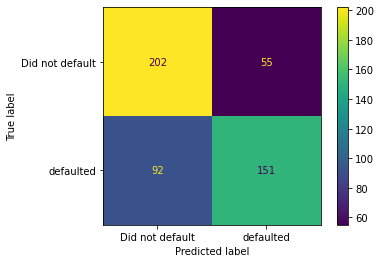

In [30]:
plot_confusion_matrix(model, 
                     X_test_scaled,
                      y_test,
                      values_format = 'd',
                      display_labels = ['Did not default', 'defaulted']
                     )

we are going to draw a support vector decision boundry

In [32]:
len(df_downsample.columns)

24

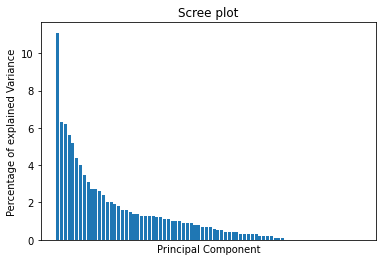

In [34]:
pca = PCA() ## By default pca centers the data, but donot scale it
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var))]

plt.bar(x = range(1, len(per_var) + 1, ), height = per_var)
plt.tick_params(
    axis = 'x', ## changes apply to x axis
    which = 'both', ## both mazor and minor ticks are affected
    bottom = False, ## ticks along the bottom edge are off
    top = False, ## ticks along the top edge are off
    labelbottom = False, ## labels along the bottom edge are off
)

plt.ylabel("Percentage of explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree plot")
plt.show()

In [37]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

# Now cneter and scale the PCs
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

# Now we optimize the SVM fit to the x and y axis coordinates of the data
# after PCA dimension reduction

param_grid = [
    {
        'C' : [1, 10, 100, 1000],
        'gamma' : ['scale', 1, 0.01, 0.001, 0.0001],
        'kernel' : ['rbf'],
    }  
]

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv = 5,
        scoring = 'accuracy',
        verbose = 2
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.0

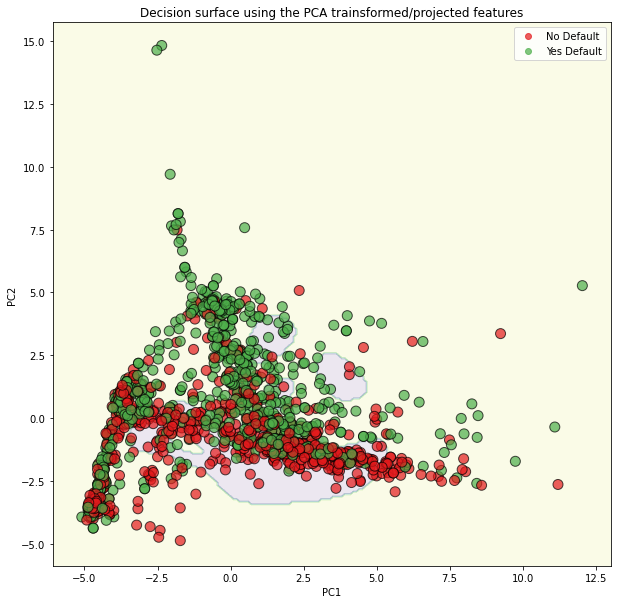

In [39]:
model = SVC(random_state = 42, C = 1000, gamma = 1)
model.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

# Now create a matrix of points that we can use to show the decision regions
# The matrix will be a littile bit larger than the tranformed PCA points so that we can 
# plot all of the PCA points on it without them being n the edge

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy, = np.meshgrid(
    np.arange(start = x_min, stop = x_max, step = 0.1),
    np.arange(start = y_min, stop = y_max, step = 0.1),
)

# Now we will classify every point in that matrix with the SVM.
# Points on the side of the classification boundary will get 0, and
# points on other side will get 1

Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))

# Right Now, Z is just a long array of lots of 0x and 1s, which reflect
# how each points in the mesh was classified.
# We use reshape() so that each classification (0 or 1) corresponds 
# to a specific point in the matrix

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (10, 10))

# we will use contourf() to draw a filled contour plot using the 
# matrix values and classifications.
# The contours will be filled with according to the predicted
# classifications (0s and 1s) in Z

ax.contourf(xx, yy, Z, alpha=0.1)

# now we create custom colors for the actual data points

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

# Now draw the actual data points -> these will be colored by their known
# (not predicted) classifications

# NOTE: setting alpha=0.7 lets us see if we are covering up a point 

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = y_train,
                    cmap = cmap,
                     s = 100,
                     edgecolors = 'k', ## k = black
                     alpha = 0.7,
                    )

# create a legend

legend = ax.legend(
    scatter.legend_elements()[0],
    scatter.legend_elements()[1],
    loc = "upper right"
)

legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.set_title("Decision surface using the PCA trainsformed/projected features")

plt.show()


The pink part of the graph is the area where all datapoints will be predicted to have not defaulted. The yellow part of the graph is the area where all datapoints will be predicted to have defaulted. The dots are datapoints in the training dataset and color coded by their known classifications. Red is for those that did not default and green is for those are defaulted.

